### Tarea 06 - Procesamiento de lenguaje natural
### Giovanni Gamaliel López Padilla

#### Punto 1

Estudie los papers de word2vec (a y b). Consteste las siguientes preguntas en sus propias
palabras.

+ 1) \textbf{¿Describa en sus propias palabras la estrategia de selección de palabras dentro de la ventana de contexto en w2v? Explique porque se hace así y cual es la intuición.}

    La estrategia de selección de palabras dentro de un contexto es recopilar aquellas palabra que co-ocurren dentro de un bigrama. Calculando el score motrado en la ecuación 1 se obtiene un score para el bigrama obtenido. Si el score es mayor a un límite puesto, el bigrama correspondiente se añade al diccionrio como un token.
    
    $$
    score(w_i,w_j) = \frac{count(w_iw_j)-\delta}{count(w_i)count(w_j)} \nonumber
    $$
    
    El parámetro $\delta$ es implementado para prevenir bigramas que no son muy frecuentes. El procedimiento se realiza para contar como un token 

+ 2) \textbf{¿Qué estrategia se usa para construir frases de palabras y construir un solo vector para conceptos basados en más de un token?}

    Usan una aproximación data-driven para identificar una gran cantidad de frases. A cada frase se le asigna un vector. Para medir la caliad del vector asignado se desarollo una de test análogicos como 
    
    $$
    toronto \rightarrow  toronto\;\;maple\;\;leafts \\ \nonumber
    Montreal \rightarrow Montreal\;\;canadiens
    $$
    
    Esto lo comprueban usando la representación más cercana a la combinación de vectores de palabras. Además de esto de verifico que las palabras asociadas tuvieran una co-ocurrencia frecuente y poco frecuente en otros contextos.

+ 3) \textbf{¿Según el autor de w2v, cuales podrían ser las diferencias o ventajas/desventajas de CBOW y Skipgram?}

    La ventaja que tiene CBOW con respecto a Skipgram es que tiene una complejidad de entrenamiento menor. La desventaja que tiene CBOW es que pierde el historial de entrada debido que que en la capa de projección realiza un promedio de los vectores ingresados. La particularidad que tiene skipgram es que sus resultados mejoran si se aumenta el tamaño de ventana pero la complejidad de entrenamiento también aumenta, provocando que el tiempo de entrenamiento se eleve. 

+ 4) \textbf{¿Cuales son las diferencias entre usar Hierachical Softmax, Negative Sampling y NCE? ¿Cuál recomienda el autor y por qué?}

    Hierachical softmax utiliza una estructura de arbol para conectar cada palabra y asi reducir el calculo de la probabildad $P(w|w_I)$. La diferencia de usar NCE es que este método necsita el corpus a entrenar y las probabilidades necesitan en softmax, en cambio Negative sampling necesita unicamente el corpus para entrenar al modelo. En ningún momento el autor recomienda el uso de un modelo, resalta que el skig-gram obtiene mejores resultados en comparación de los resultados mostrados por Collobert, Turianm y Mnih.
    
+ 5) \textbf{¿Cual diría usted que es la principal conclusión y aportación del paper de w2v? ¿Qué crítica haría usted a estos papers de w2v?}

    La principal conclusión que de obtiene es el método que se empleo en w2v para realizar el entrenamiento de la red neuronal, demostrando la optimización de tiempo de entrenamiento y el accuracy obtenido. Una crítica que daría al paper sería el no exponer alguna medición con respecto a la memoria usada en cada método, ya que unicamente se menciona que realizan métodos para reducir el uso de la misma.

#### Punto 2

Lea el paper de Glove y explique brevemente los siguientes puntos:

+ 1) \textbf{¿Qué desventaja trata de solucionar de w2v?}

    El modelo de Glove trata de crear una regularidad en la creación de la representación de palabras en vectores. Combinando las ventajas de los modelos de factorización global de matrices y el contexto local en una ventana de texto.

+ 2) \textbf{Describa en sus propias palabras y de manera general cual es la principal estrategia para lograrlo.}

    Se construye un modelo para representar las palabras tomando en cuenta las co-ocurrencias dentro de un contexto de palabras. Esta representación se obtiene a partir de aproximaciones como funciones de potencias, números armónicos y descomposiciones truncadas de SVD.

+ 3) \textbf{Explique en sus propias palabras las principales conclusiones de los experimentos. Comente si cree que se logró el objetivo.}

    El método de Glove obtuvo mejores resultados en accuracy en comparación con los métodos de CBOW y Skip-Gram. Conforme se aumentan las iteraciones se obtiene una mayor accuracy hasta que llega un punto en donde empieza a oscilar, por lo que se puede definir un máximo de iteraciones para obtener un buen resultado. El accuracy obtenido por la sintáctica aprendida por el modelo aumenta conforme el número de tokens en el corpus aumenta. En cambio el accuracy obtenido por la semántica del modelo no esta relacionada a el número de tokens en el corpus. Ya que se obtuvieron valores altos para corpus con dos ordenes de magnitud de diferencia y entre ellos valores menores de accuracy.

+ 4) \textbf{¿Encuentra alguna relación entre Glove y las clasicas TCOR y DOR? ¿Cuáles?}

    La relación que tiene Glove, TCOR y DOR es que estan basadas en la teoría de co-ocurrencias de palabras en un corpus. 
    
+ 5) \textbf{¿Cual diría usted que es la principal conclusión y aportación del paper de Glove? ¿Qué crítica haría usted a este paper de Glove?}

    Glove obtiene un mejor desempeño con la representación obtenida a comparación del estado del arte en el tiempo en que se publico el articulo. El apartado de funciones llega a ser confuso, ya que se puede interpretar como una igualdad pero es como una representación. 

#### Punto 3

Lea los papers de Directional Word2Vec, Fast Text, el de gnome-mining, así como el paper de
CNNs de Kim y conteste.

+ 1) \textbf{¿Qué desventaja trata de solucionar FastText y cómo lo logra?}

     Una desventaja que trata de es añadir la morfología de las palabras, esto debido a que existen lenguajes con bastantes palabras y muchas palabras que no son tan usadas. El modelo que proponen esta basado en vectores de palabras calculados con el promedio vectores construidos por n-gramas de caracteres. 

+ 2) \textbf{¿Cuál sería la principal desventaja de FastText vs Word2Vec?}

    La representación de palabras no incluidas en en vocabulario en cada corpus es reemplazada por un simbolo, por lo cual existen corpus los cuales la comparación no sea la adecuada debido a la inconsistencia que se pueda generar.

+ 3) \textbf{¿Qué desventaja trata de solucionar el paper de Directional W2V y cómo lo logra? Describa brevemente las conclusiones de la sección experimental.}

    Los modelos basados en skip-gram no realizan una diferencia en la posición de las palabras en el contexto dado, algo semejante a tener una bag of words pero unicamente para el contexto de la palabra central. Para esto se propuso un modelo que añade esta relación de las palabras del contexto guardando su posición relativa con respecto a la palabra central. Los modelos SG y DSG llegan a tener un valor mayor en la velocidad de entrenamiento conforme aumenta la ventana de contexto en comparación de los modelos SSSG y SSG. Para medir la similitud de palabras se obtuvieron dos corpus, el corpus largo es la wikipedia y el corpus pequeño se utilizo el 0.1% de la wikipedia. Los resultados arrojaron que se obtuvieron peores resultados añ usar un corpus pequeño. Esto puede señalar que el problema de tener datos sparce es crítico para el entrenamiento. El modelo DSG obtiene resultados robustos los cuales no son afectados pór tener datos sparce. Aunado a esto, se obtienen mejores resultados con corpus largos. En otra prueba se obtuvo que el modelo DSG es mejor a todos realizando la tarea de obtener POST tags, esto debido a que se captura la información sintáctica.

+ 4) \textbf{¿Qué se dice acerca del análisis de complejidad del Directional w2v?}

    La complejidad obtenida del modelo DSG añade una operación más en comparación del modelo SG. 
    
+ 5) \textbf{En el paper de gnome-mining, ¿Qué técnicas de NLP son usadas y con que objetivo intuitivo cada una?}

    Respuesta
+ 6) \textbf{¿En que problemas de clasificación evaluó Kim su CNN?}
 
     Respuesta
     
+ 7) \textbf{En los resultados dónde estuvo involucrado algún método de clasificación con SVM, ¿Cómo fue el resultado respecto a CNNs? ¿Qué features usaba el método basado en SVM?}

    Respuesta
 
+ 8) \textbf{En sus propias palabras, ¿Qué diferencia tienen las estrategias multi-channel y single-channel?, ¿Cuál recomienda Kim?}

    Respuesta
 
+ 9) \textbf{¿Cuál diría usted que es la principal conclusión y aportación del paper de Kim? ¿Qué crítica le haría usted a Kim?}

    Respuesta
  

#### Punto 4

Estudie superficialmente el siguiente notebook: https://github.com/fagonzalezo/dl-tau-2017-2/blob/master/Handout-CNN-sentence-classification.ipynb En esta tarea se le pro-
porcionará el CNN-rand pero en Pytorch. Investigue lo necesario para completar el CNN-static y el CNN-non-static por usted mismo. Contruya la gŕafica de comparación de los tres.

In [ ]:
!mkdir Modules/
!cp -r /content/drive/MyDrive/Lenguaje/Tarea_06/Modules/*.py Modules/

In [ ]:
# Inicializacion de los datos y parametros a utilizar
from Modules.datasets import get_params,get_args
from Modules.Mex_data import Mex_data_class
params = get_params()
args = get_args()
data = Mex_data_class(params, args)

In [ ]:
from Modules.nn_models import CNNTextCls,model_class,save_stadistics
# Creacion de la red neuronal CNN rand
CNN_model = CNNTextCls(args)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# entrenamiento del modelo
stadistics = model.run()
save_stadistics(params,
                stadistics)

In [ ]:
# lectura y creacion de la matriz de embeddings de word2vec
from Modules.word2vec import word2vec_class
word2vec_model = word2vec_class(params, args)
embedding = word2vec_model.obtain_embedding_matrix(data)

In [ ]:
# Creacion de la red neuronal CNN non static
params["stadistics  file"] = "stadistics_non_static.csv"
CNN_model = CNNTextCls(args, embeddings=embedding)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# ejecuccion del entrenamiento
stadistics = model.run()
save_stadistics(params,
                stadistics)

In [ ]:
# Creacion de la red neuronal CNN static
params["stadistics  file"] = "stadistics_static.csv"
CNN_model = CNNTextCls(args,
                       embeddings=embedding,
                       freeze=True)
model = model_class(CNN_model,
                    args,
                    data.train_loader,
                    data.validation_loader)
# ejecucción del entrenamiento de la red neuronal
stadistics = model.run()
save_stadistics(params,
                stadistics)

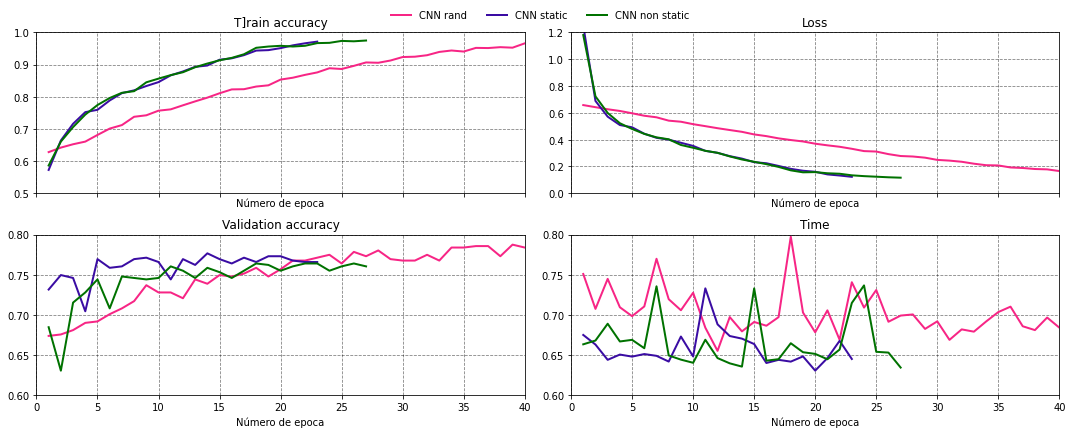

In [1]:
from Modules.datasets import get_params
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import linspace
from os.path import join

params = get_params()
files = {"stadistics.csv": {"name": "CNN rand",
                            "color": "#f72585"},
         "stadistics_static.csv": {"name": "CNN static",
                                   "color": "#3a0ca3"},
         "stadistics_non_static.csv": {"name": "CNN non static",
                                       "color": "#007200",
                                       }}
parameters = {"Train acc": {"title": "T]rain accuracy",
                            "y lim": [0.5, 1]},
              "Loss": {"title": "Loss",
                       "y lim": [0, 1.2]},
              "Val acc": {"title": "Validation accuracy",
                          "y lim": [0.6, 0.8]},
              "Time": {"title": "Time",
                       "y lim": [0.6, 0.8]}}
results = {}
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15, 6))
axs = axs.flatten()
for filename in files:
    model_name = files[filename]["name"]
    color = files[filename]["color"]
    filename = join(params["path results"],
                    filename)
    data = read_csv(filename,
                    index_col=0)
    for ax, parameter in zip(axs, parameters):
        dataset = parameters[parameter]
        ax.set_xlim(0, 40)
        ax.set_ylim(dataset["y lim"][0],
                    dataset["y lim"][1])
        ax.set_xticks(linspace(0, 40, 9))
        ax.set_title(dataset["title"])
        ax.set_xlabel("Número de epoca")
        ax.plot(data.index,
                data[parameter],
                label=model_name,
                color=color,
                lw=2,)
        ax.grid(ls="--",
                color="#000000",
                alpha=0.5)
plt.tight_layout()
lines, labels = ax.get_legend_handles_labels()
fig.legend(lines,
           labels,
           frameon=False,
           ncol=3,
           bbox_to_anchor=(0.65, 1.01),
           )
plt.show()